<a href="https://colab.research.google.com/github/Khasnuwr/Brain-Tumor-Segmentation/blob/main/Brain_Tumor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!git clone https://github.com/Khasnuwr/Brain-Tumor-Segmentation/

Cloning into 'Brain-Tumor-Segmentation'...
remote: Enumerating objects: 5873, done.
remote: Total 5873 (delta 0), reused 0 (delta 0), pack-reused 5873
Receiving objects: 100% (5873/5873), 325.53 MiB | 39.96 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Updating files: 100% (6269/6269), done.


In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/Brain-Tumor-Dataset/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(238).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image (52).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(175).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/4.jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(327).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(96).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(241).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(57).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(155).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(313).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(320).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(215).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(232).jpg
/content/Brain-Tumor-Dataset/dataset/Training/no_tumor/image(92).jpg
/content/Brain-Tumor-Dataset/dat

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [10]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [12]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('/content/Brain-Tumor-Dataset/dataset/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

for i in labels:
    folderPath = os.path.join('/content/Brain-Tumor-Dataset/dataset/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [13]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [15]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 73, 73, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 73, 73, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                        

In [18]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [19]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 [==============================] - 25s 145ms/step - loss: 1.7304 - accuracy: 0.2800 - val_loss: 1.3628 - val_accuracy: 0.2789
Epoch 2/20
83/83 [==============================] - 8s 92ms/step - loss: 1.3368 - accuracy: 0.3303 - val_loss: 1.2941 - val_accuracy: 0.4014
Epoch 3/20
83/83 [==============================] - 8s 92ms/step - loss: 1.1168 - accuracy: 0.5081 - val_loss: 1.0032 - val_accuracy: 0.5646
Epoch 4/20
83/83 [==============================] - 8s 92ms/step - loss: 0.9303 - accuracy: 0.5986 - val_loss: 0.8964 - val_accuracy: 0.6361
Epoch 5/20
83/83 [==============================] - 8s 94ms/step - loss: 0.8192 - accuracy: 0.6500 - val_loss: 0.9203 - val_accuracy: 0.5782
Epoch 6/20
83/83 [==============================] - 8s 93ms/step - loss: 0.7344 - accuracy: 0.7007 - val_loss: 0.8737 - val_accuracy: 0.6259
Epoch 7/20
83/83 [==============================] - 8s 92ms/step - loss: 0.6980 - accuracy: 0.7185 - val_loss: 0.8067 - val_accuracy: 0.6633
Epoch 8/20


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
model.save('braintumor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


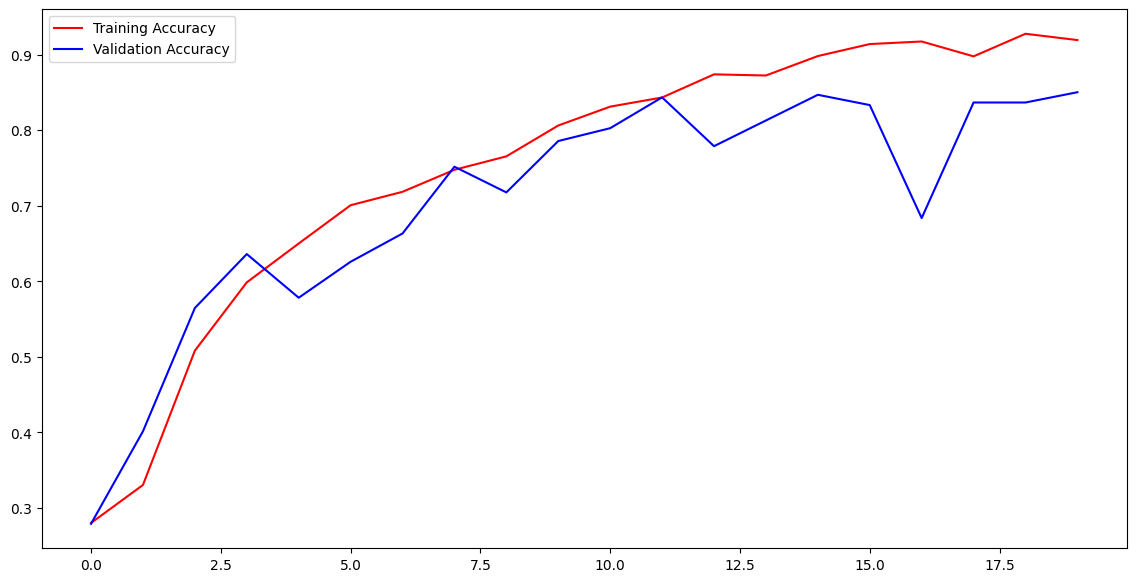

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

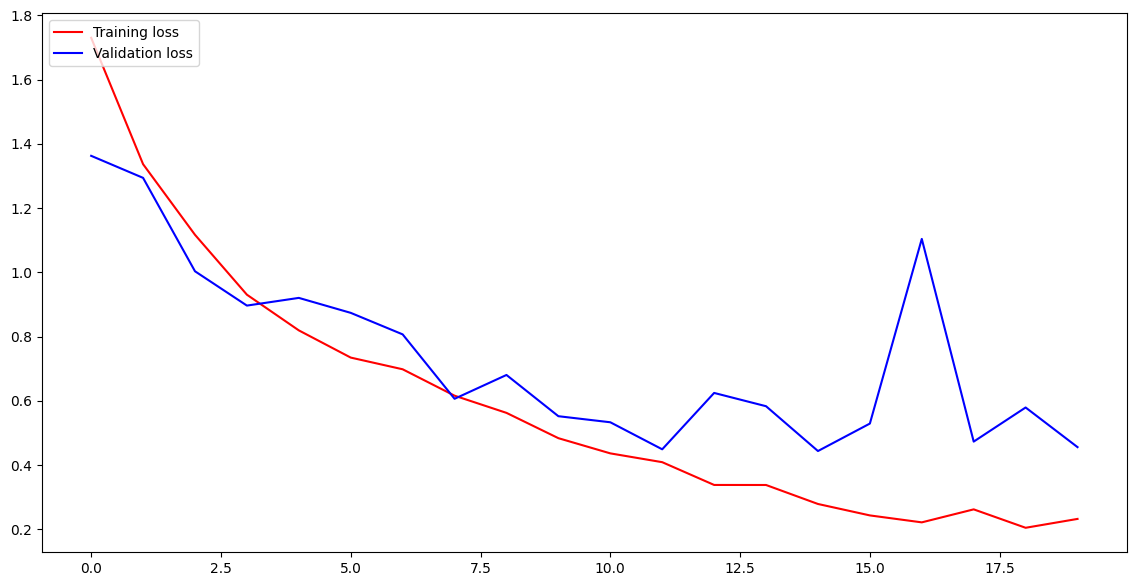

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [45]:
img = cv2.imread('/content/Brain-Tumor-Dataset/dataset/Testing/pituitary_tumor/image(92).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [46]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

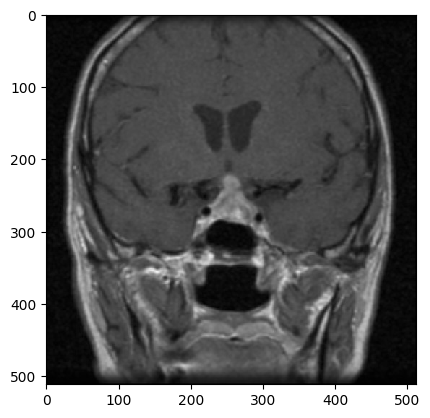

In [47]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/Brain-Tumor-Dataset/dataset/Testing/pituitary_tumor/image(92).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [48]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 18ms/step


3

In [56]:
if indices == 0:
  print("Predicted Class is Glioma Tumor")

if indices == 1:
  print("Predicted Class is Meningioma Tumor")

if indices == 2:
  print("Predicted Class is No Tumor")

if indices == 3:
  print("Predicted Class is Pituitary Tumor")

Predicted Class is Pituitary Tumor


**Predict from saved model**

In [50]:
from tensorflow.keras.models import load_model

In [52]:
saved_model = load_model('/content/braintumor.h5')

In [54]:
saved_model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 34ms/step


3

In [55]:
if indices == 0:
  print("Predicted Class is Glioma Tumor")

if indices == 1:
  print("Predicted Class is Meningioma Tumor")

if indices == 2:
  print("Predicted Class is No Tumor")

if indices == 3:
  print("Predicted Class is Pituitary Tumor")

Predicted Class is Pituitary Tumor
